<a href="https://colab.research.google.com/github/kzeynep/Python_Atil_hoca/blob/main/LogisticRegressionAdvanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("8-fraud_detection.csv")

In [3]:
df.columns

Index(['transaction_amount', 'transaction_risk_score', 'is_fraud'], dtype='object')

In [4]:
df.head()

,transaction_amount,transaction_risk_score,is_fraud
0,1.879910,-1.485035,0
1,0.377083,-2.238585,0
2,1.354312,-2.664638,0
3,-0.509843,-1.502950,0
4,0.863561,-1.906364,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      10000 non-null  float64
 1   transaction_risk_score  10000 non-null  float64
 2   is_fraud                10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [6]:
df["is_fraud"].value_counts()

,count
is_fraud,
0,9846
1,154


In [7]:
X=df.drop('is_fraud',axis=1)
y=df['is_fraud']

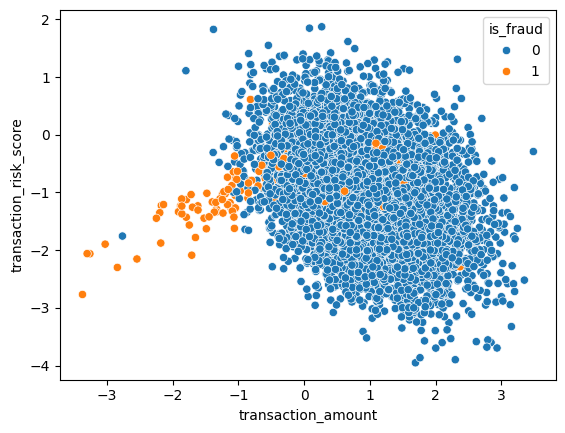

In [8]:
sns.scatterplot(x=X["transaction_amount"],y=X["transaction_risk_score"],hue=y)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [11]:
#hyperparameter tuning with class weights to handle imbalance
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [12]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [13]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [15]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [16]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'saga'}

In [17]:
y_pred=grid.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
score=accuracy_score(y_pred,y_test)
print("score: ", score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n " , confusion_matrix(y_pred,y_test))

score:  0.9896
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2480
           1       0.42      0.80      0.55        20

    accuracy                           0.99      2500
   macro avg       0.71      0.90      0.77      2500
weighted avg       0.99      0.99      0.99      2500

confusion matrix: 
  [[2458   22]
 [   4   16]]


In [21]:
# roc, auc
# The ROC Curve is a graphical representation of a classification model’s performance across different threshold values. It plots the True Positive Rate (Recall) on the Y-axis against the False Positive Rate (1 - Specificity) on the X-axis. • A model that perfectly distinguishes between classes has a curve that reaches the top-left corner. • The closer the curve is to the top-left, the better the model. • The area under the ROC curve (AUC) quantifies this performance: • AUC = 1 → perfect classifier • AUC = 0.5 → random guessing

#ROC is especially useful for imbalanced datasets, as it evaluates the model independent of class distribution or threshold.

In [22]:
model_prob=grid.predict_proba(X_test)

In [23]:
model_prob

array([[0.99662505, 0.00337495],
       [0.85465981, 0.14534019],
       [0.95561645, 0.04438355],
       ...,
       [0.99092735, 0.00907265],
       [0.98588427, 0.01411573],
       [0.99793358, 0.00206642]])

In [24]:

##  probabilities for the positive class
model_prob=model_prob[:,1]

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [26]:
model_auc=roc_auc_score(y_test,model_prob)

In [27]:
model_auc

np.float64(0.735420496814742)

In [28]:
# model false positive rate
# model true positive rate
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [29]:
thresholds

array([           inf, 9.46498536e-01, 6.11641475e-01, 5.72177426e-01,
       5.59049179e-01, 3.05195661e-01, 3.04999867e-01, 2.72312265e-01,
       2.70611429e-01, 1.84043563e-01, 1.82336569e-01, 1.75391876e-01,
       1.75233246e-01, 1.39298223e-01, 1.38964807e-01, 7.78000199e-02,
       7.77914752e-02, 5.63763017e-02, 5.63259250e-02, 5.51740368e-02,
       5.50929417e-02, 4.28292461e-02, 4.27643212e-02, 4.18374888e-02,
       4.18174587e-02, 2.78972426e-02, 2.78809863e-02, 2.24168722e-02,
       2.23971850e-02, 2.10526500e-02, 2.10281166e-02, 2.07144360e-02,
       2.07087600e-02, 1.61367645e-02, 1.61241264e-02, 1.26119929e-02,
       1.25951016e-02, 1.25389534e-02, 1.24993034e-02, 9.29080425e-03,
       9.28192354e-03, 8.75123245e-03, 8.71323260e-03, 8.00585583e-03,
       7.99945028e-03, 7.37742776e-03, 7.37563550e-03, 6.75344828e-03,
       6.75145390e-03, 4.33549760e-04])

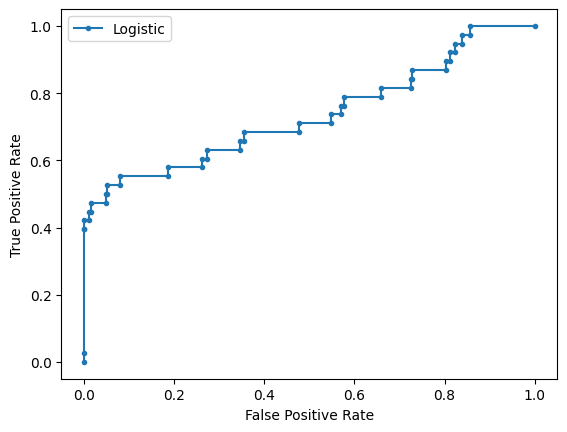

In [30]:
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

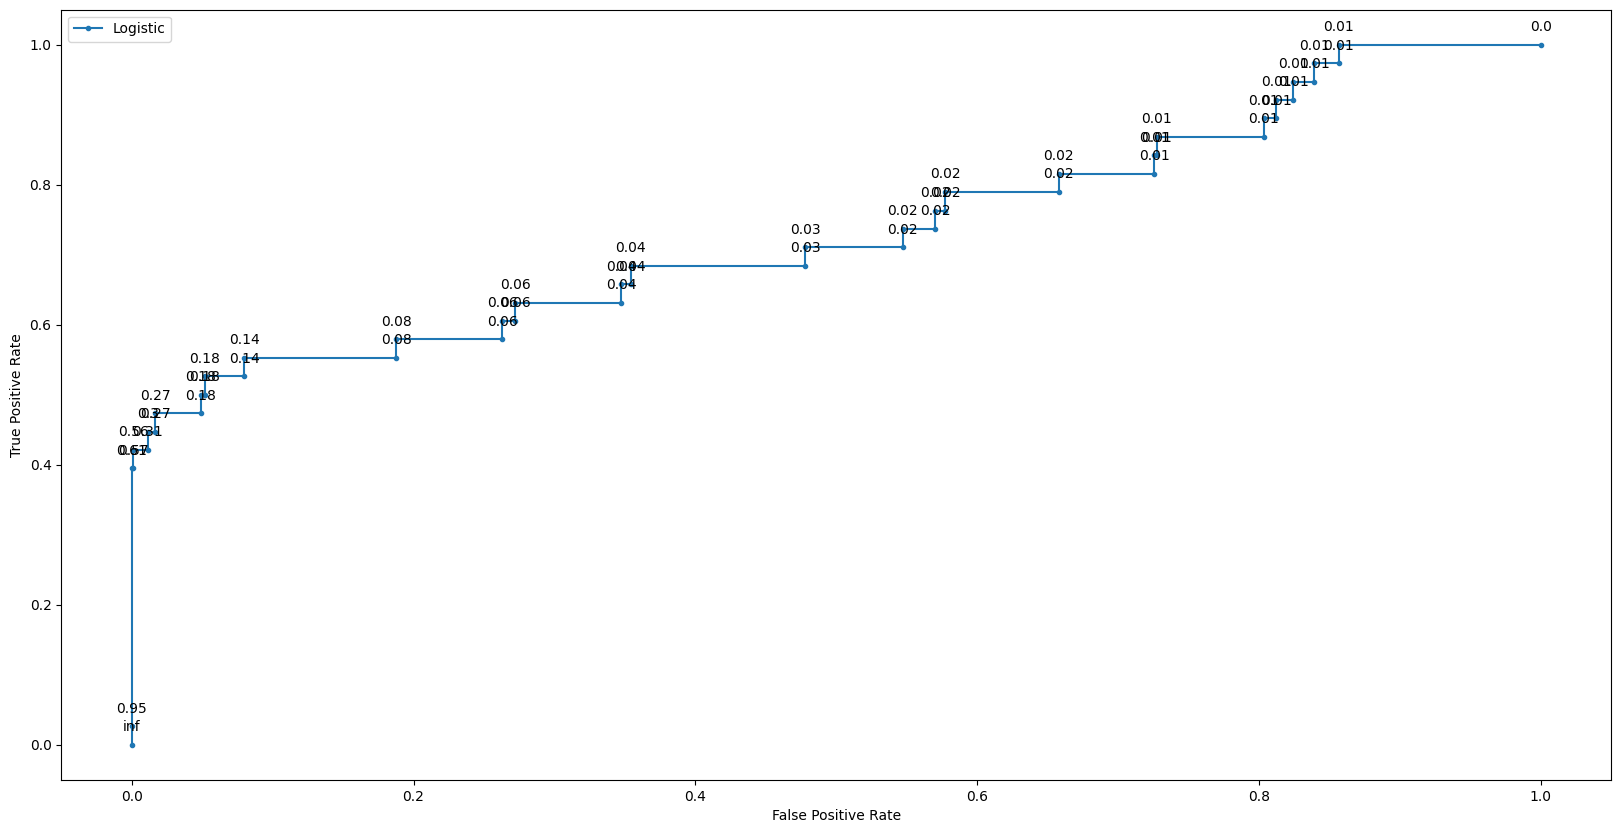

In [31]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot ROC curve
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate each point with the threshold
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', (fpr, tpr), textcoords="offset points", xytext=(0,10), ha='center')

# Labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
plt.show()

In [32]:
# Pick a custom threshold (e.g., from your annotated ROC curve)
custom_threshold = 0.2  # You can change this to what you chose

# Predict using custom threshold
y_pred_custom = (model_prob >= custom_threshold).astype(int)
print(model_prob >= custom_threshold)
print(y_pred_custom)

# Evaluate
print(f"\n Evaluation using custom threshold = {custom_threshold}")
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[False False False ... False False False]
[0 0 0 ... 0 0 0]

 Evaluation using custom threshold = 0.2
[[2365   97]
 [  20   18]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2462
           1       0.16      0.47      0.24        38

    accuracy                           0.95      2500
   macro avg       0.57      0.72      0.61      2500
weighted avg       0.98      0.95      0.96      2500



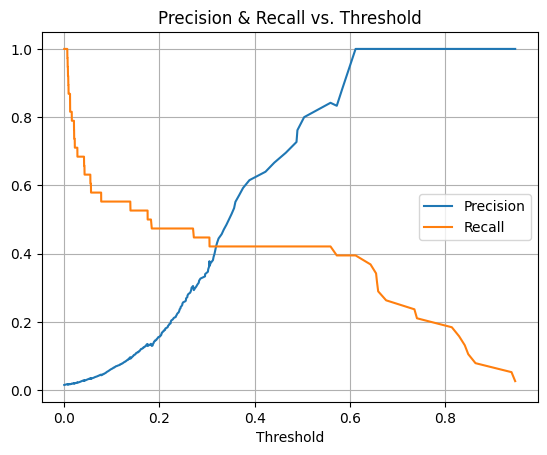

In [33]:
#If you want to find the best threshold based on precision, recall, or F1 you can plot Performance Metrics at Different Thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, model_prob)

# Plot precision and recall vs threshold
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.grid()
plt.show()